## Sim runs in Unreal Maze Environment

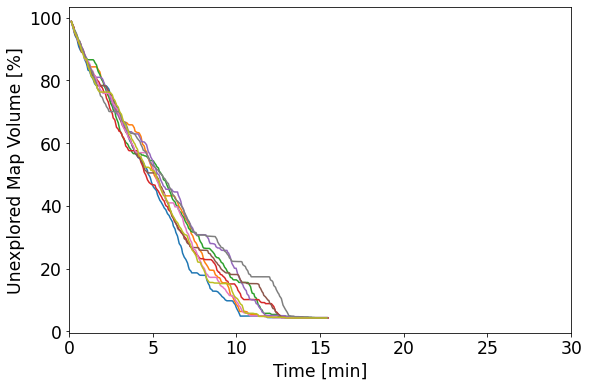

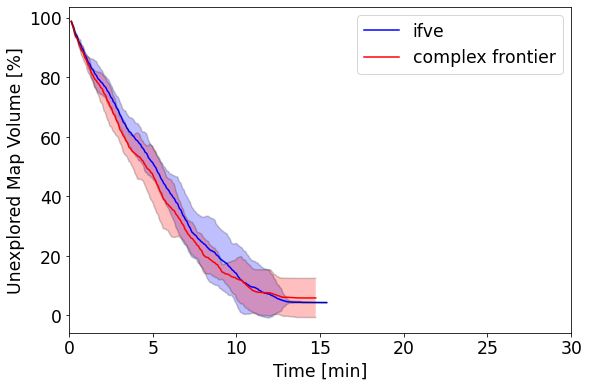

In [17]:
import csv
import numpy as np
import matplotlib.pyplot as plt

data_path = "/home/andrew/tests/data/unreal_maze"
full_map_volume = 39.6*39.6*2.8 # meters

N_tests = 6
for i in range(N_tests):
    data_filename = "unreal_maze_complex_frontier_test" + str(i) + "_map.csv"
    data = np.array(np.genfromtxt(data_path + "/" + data_filename, delimiter=",", skip_header=1))
    file = open(data_path + "/" + data_filename)
    reader = csv.reader(file)
    N = len(list(reader))
    voxel_size = np.genfromtxt(data_path + "/" + data_filename, delimiter=",", skip_footer=(N-1))
    t_frontier = data[:214,0]/60.0
    map_data = (1-(voxel_size**3)*data[:214,1]/full_map_volume)*100
    if (i==0):
        map_volume_ratios = map_data
    else:
        map_volume_ratios = np.vstack((map_volume_ratios, map_data))

map_volume_ratios_mean_frontier = np.mean(map_volume_ratios, axis=0)
map_volume_ratios_std_dev_frontier = np.std(map_volume_ratios, axis=0)
map_volume_ratios_min_frontier = np.min(map_volume_ratios, axis=0)
map_volume_ratios_max_frontier = np.max(map_volume_ratios, axis=0)

N_tests = 10
fig, ax = plt.subplots(figsize=[9.0, 6.0])
plt.xlim(0, 30)
ax.tick_params(axis='both', which='major', labelsize='xx-large')
plt.xlabel("Time [min]", fontsize='xx-large')
plt.ylabel("Unexplored Map Volume [%]", fontsize='xx-large')
for i in range(1,N_tests):
    data_filename = "unreal_maze_ifve_test" + str(i) + "_map.csv"
    data = np.array(np.genfromtxt(data_path + "/" + data_filename, delimiter=",", skip_header=1))
    file = open(data_path + "/" + data_filename)
    reader = csv.reader(file)
    N = len(list(reader))
    voxel_size = np.genfromtxt(data_path + "/" + data_filename, delimiter=",", skip_footer=(N-1))
    t_ifve = data[:224,0]/60.0
    map_data = (1-(voxel_size**3)*data[:224,1]/full_map_volume)*100
    plt.plot(t_ifve, map_data)
    if (i==1):
        map_volume_ratios = map_data
    else:
        map_volume_ratios = np.vstack((map_volume_ratios, map_data))

map_volume_ratios_mean_ifve = np.mean(map_volume_ratios, axis=0)
map_volume_ratios_std_dev_ifve = np.std(map_volume_ratios, axis=0)
map_volume_ratios_min_ifve = np.min(map_volume_ratios, axis=0)
map_volume_ratios_max_ifve = np.max(map_volume_ratios, axis=0)


# plt.figure(figsize=[12.0, 7.0])
fig, ax = plt.subplots(figsize=[9.0, 6.0])
ax.tick_params(axis='both', which='major', labelsize='xx-large')
plt.xlabel("Time [min]", fontsize='xx-large')
plt.ylabel("Unexplored Map Volume [%]", fontsize='xx-large')
plt.plot(t_ifve, map_volume_ratios_mean_ifve, "b", label="ifve")
plt.plot(t_ifve, map_volume_ratios_mean_ifve - 2*map_volume_ratios_std_dev_ifve, "k", alpha=0.2)
plt.plot(t_ifve, map_volume_ratios_mean_ifve + 2*map_volume_ratios_std_dev_ifve, "k", alpha=0.2)
ax.fill_between(t_ifve, map_volume_ratios_mean_ifve - 2*map_volume_ratios_std_dev_ifve, map_volume_ratios_mean_ifve + 2*map_volume_ratios_std_dev_ifve, alpha=0.25, facecolor="blue")
plt.plot(t_frontier, map_volume_ratios_mean_frontier, "r", label="complex frontier")
plt.plot(t_frontier, map_volume_ratios_mean_frontier - 2*map_volume_ratios_std_dev_frontier, "k", alpha=0.2)
plt.plot(t_frontier, map_volume_ratios_mean_frontier + 2*map_volume_ratios_std_dev_frontier, "k", alpha=0.2)
ax.fill_between(t_frontier, map_volume_ratios_mean_frontier - 2*map_volume_ratios_std_dev_frontier, map_volume_ratios_mean_frontier + 2*map_volume_ratios_std_dev_frontier, alpha=0.25, facecolor="red")
plt.xlim(0, 30)
plt.legend(fontsize='xx-large')

(0.0, 100.0)

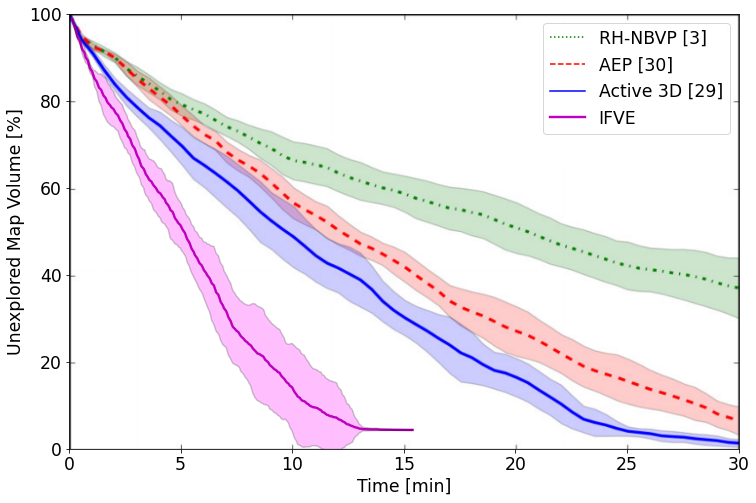

In [18]:
# Add in schmid data on same axes
fig, ax = plt.subplots(figsize=[12.0, 8.0])
ax.tick_params(axis='both', which='major', labelsize='xx-large')
plt.xlabel("Time [min]", fontsize='xx-large')
plt.ylabel("Unexplored Map Volume [%]", fontsize='xx-large')

img = plt.imread(data_path + "/Schmid_Volume_vs_Time_Maze_pruned.png")
ax.imshow(img, extent=[0, 30, 0, 100], aspect="auto")
ax.plot(100, 0, "g:", label="RH-NBVP [3]")
ax.plot(100, 0, "r--", label="AEP [30]")
ax.plot(100, 0, "b", label="Active 3D [29]")
ax.plot(t_ifve, map_volume_ratios_mean_ifve, "m", label="IFVE", linewidth=2.4)
# ax.plot(t_ifve, map_volume_ratios_min_ifve, "k", alpha=0.2)
# ax.plot(t_ifve, map_volume_ratios_max_ifve, "k", alpha=0.2)
# ax.fill_between(t_ifve, map_volume_ratios_min_ifve, map_volume_ratios_max_ifve, alpha=0.25, facecolor="magenta")
plt.plot(t_ifve, map_volume_ratios_mean_ifve - 2*map_volume_ratios_std_dev_ifve, "k", alpha=0.2)
plt.plot(t_ifve, map_volume_ratios_mean_ifve + 2*map_volume_ratios_std_dev_ifve, "k", alpha=0.2)
ax.fill_between(t_ifve, map_volume_ratios_mean_ifve - 2*map_volume_ratios_std_dev_ifve, map_volume_ratios_mean_ifve + 2*map_volume_ratios_std_dev_ifve, alpha=0.25, facecolor="magenta")
# ax.plot(t_frontier, map_volume_ratios_mean_frontier, "r", label="complex frontier")
# ax.plot(t_frontier, map_volume_ratios_min_frontier, "k", alpha=0.2)
# ax.plot(t_frontier, map_volume_ratios_max_frontier, "k", alpha=0.2)
# ax.fill_between(t_frontier, map_volume_ratios_min_frontier, map_volume_ratios_max_frontier, alpha=0.25, facecolor="red")
# plt.plot(t_frontier, map_volume_ratios_mean_frontier - 2*map_volume_ratios_std_dev_frontier, "k", alpha=0.2)
# plt.plot(t_frontier, map_volume_ratios_mean_frontier + 2*map_volume_ratios_std_dev_frontier, "k", alpha=0.2)
# ax.fill_between(t_frontier, map_volume_ratios_mean_frontier - 2*map_volume_ratios_std_dev_frontier, map_volume_ratios_mean_frontier + 2*map_volume_ratios_std_dev_frontier, alpha=0.25, facecolor="red")

plt.legend(fontsize='xx-large')
plt.xlim(0, 30)
plt.ylim(0,100)
# ax.figure.set_size_inches(9.0, 6.0)